# CH1

some explanations


In [1]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib import gridspec
from ccgpack.shapes import *
import tensorflow as tf

%matplotlib inline

/home/gf/packages/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 199.5, 199.5, -0.5)

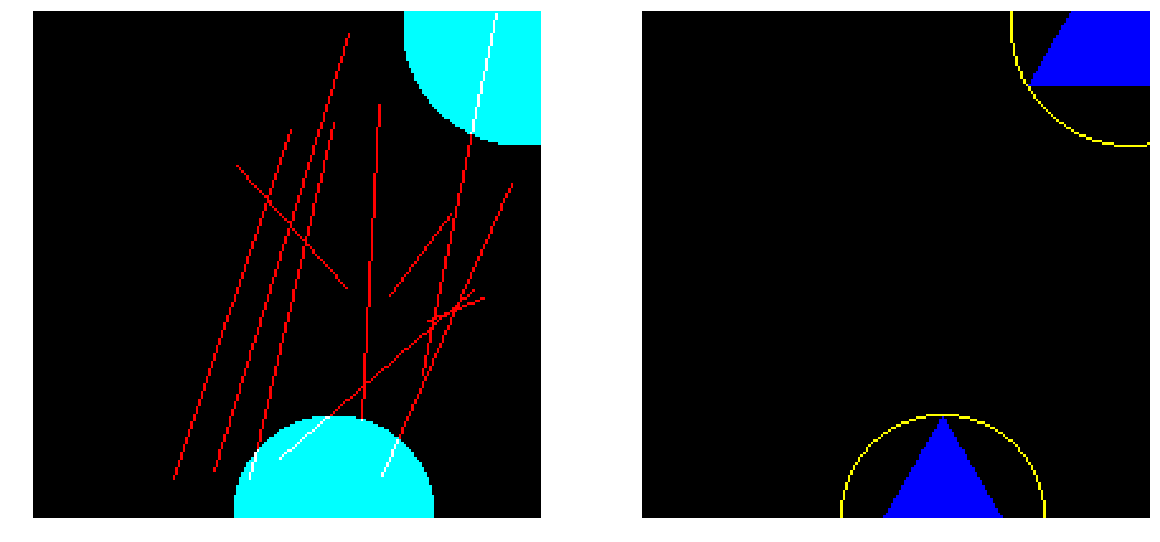

In [3]:
fig, (ax1,ax2)= plt.subplots(ncols=2, nrows=1, figsize=(20, 10))

num = 200
imgx = np.zeros((num, num, 3), dtype=np.double)
imgy = np.zeros((num, num, 3), dtype=np.double)

num = 10
begins = random_inside(imgx,num=num)
ends = random_inside(imgx,num=num)

rs = np.random.randint(10,50,2)
centers = random_inside(imgx,num=2)

imgx = draw_line(imgx,begins=begins,ends=ends,value=(1,0,0))
imgx = draw_circle(imgx,centers=centers,rs=rs,rmin=10,rmax=20,fill=True,value=(0,1,1))

imgy = draw_circle(imgy,centers=centers,rs=rs,rmin=10,rmax=20,value=(1,1,0))
# imgy = draw_square(imgy,centers=centers,lxs=rs,lys=rs,fill=True,value=(0,0,1))
imgy = draw_equitri(imgy,centers,rs,fill=1,value=(0,0,1))


ax1.imshow(imgx)
ax1.axis('off')
ax2.imshow(imgy)
ax2.axis('off')

In [3]:
def data_provider(n):
    
    x = []
    y = []
    for i in range(n):
    
        imgx = np.zeros((num, num, 3), dtype=np.double)
        imgy = np.zeros((num, num, 3), dtype=np.double)

#         # draw line
#         for _ in range(50):
#             lc = np.random.randint(10,num-10,4)
#             rr, cc = line(lc[0], lc[1], lc[2], lc[3])
#             imgx[rr, cc, 0] = 10

        for _ in range(3):
            # fill circle
            circ = np.random.randint(50,num-50,2)
            rmax = np.min([np.min(circ), np.min(num-circ)])
            rad = np.random.randint(10,rmax)
            rr, cc = circle(circ[0], circ[1], rad, imgx.shape)
            imgy[rr, cc, :] = (10, 10, 0)

            for rp in range(rad-5,rad):
                rr, cc = circle_perimeter(circ[0], circ[1], rp)
                imgx[rr, cc, :] = (50, 0, 50)
        
        x.append(imgx)
        y.append(imgy)
        
    return np.array(x),np.array(y)

(15, 200, 200, 3)


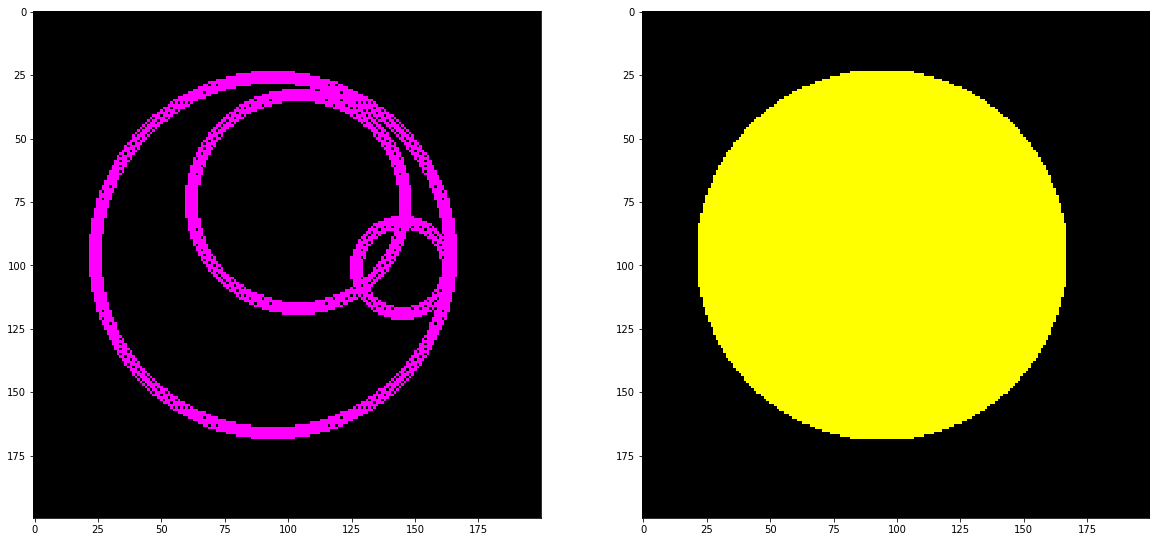

In [4]:
x,y = data_provider(15)
print (x.shape)

fig, (ax1,ax2)= plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
ax1.imshow(x[0])
ax2.imshow(y[0])

In [5]:
nx,ny,n_channel = num,num,3

x_in = tf.placeholder(tf.float32,[None,nx,ny,n_channel])
y_true = tf.placeholder(tf.float32,[None,nx,ny,n_channel])
learning_rate = tf.placeholder(tf.float32)
# drop_out = tf.placeholder(tf.float32)

x1 = tf.layers.conv2d(x_in,filters=8,kernel_size=5,strides=(1, 1),padding='same',
        activation=tf.nn.relu)
x = tf.layers.conv2d(x1,filters=8,kernel_size=5,strides=(1, 1),padding='same',
        activation=tf.nn.relu)
x = tf.layers.conv2d(x,filters=8,kernel_size=5,strides=(1, 1),padding='same',
        activation=tf.nn.relu)
x = tf.layers.conv2d(x,filters=8,kernel_size=5,strides=(1, 1),padding='same',
        activation=tf.nn.relu)
x = x+x1
x = tf.layers.conv2d(x,filters=8,kernel_size=5,strides=(1, 1),padding='same',
        activation=tf.nn.relu)
x = tf.layers.conv2d(x,filters=8,kernel_size=5,strides=(1, 1),padding='same',
        activation=tf.nn.relu)

# x = tf.layers.dropout(x, drop_out)
x_out = tf.layers.conv2d(x,filters=n_channel,kernel_size=5,strides=(1, 1),padding='same',
        activation=tf.nn.relu)

cost = tf.reduce_mean(tf.pow(y_true - x_out, 2))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

sess = tf.InteractiveSession()
init = tf.global_variables_initializer()
sess.run(init)

In [6]:
for i in range(500):
    x,y = data_provider(5)
    _, c = sess.run([optimizer, cost], feed_dict=
                     {x_in: x, y_true: y, learning_rate: 0.01})
    if i%10==0:
        print c

24.159866
25.486666
17.020065
13.638023
23.58673
9.905247
14.767963
7.520961
11.576756
7.8374424
9.053383
10.326977
10.694781
11.660867
8.376747
9.277324
9.236956
6.485475
7.616083
7.5096693
9.748803
8.129698
8.6674595
8.771514
7.587643
9.58379
8.864064
5.2389116
7.477928
7.694965
8.570385
7.1277275
9.38411
6.917665
8.036501
8.185485
11.959385
8.500731
7.173919
9.58676
6.2518024
6.3856707
4.8499484
4.9942183
7.6951365
6.6986737
6.916099
6.3075686
5.648465
10.300418


Text(0.5,1,'Prediction')

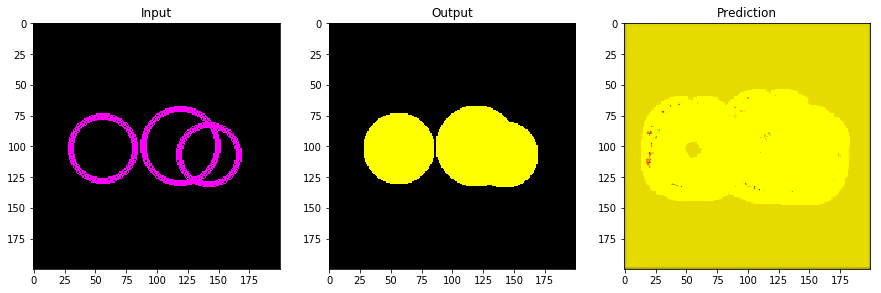

In [7]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,nrows=1,figsize=(15,7))

x,y = data_provider(1)

x_pred = sess.run(x_out, feed_dict={x_in:x})
    
ax1.imshow(x[0])
ax1.set_title('Input')
ax2.imshow(y[0])
ax2.set_title('Output')
ax3.imshow(x_pred[0])
ax3.set_title('Prediction')